In [4]:
# for displaying image in google colab
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
# function to detect circles in the image
def detect_circles(image):
  # save a copy of original image for plotting circles after applying hough transform
  output = image.copy()
  # convert image to grayscale
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # apply gaussian filter
  d=1
  d1=2
  # different sigma values are used for gaussian blur 
  img = cv2.GaussianBlur(img, (2*d+1, 2*d1+1), -1)
  print("\n\n*************Gaussian Blur**************")
  cv2_imshow(img)
  # apply median filter
  img = cv2.medianBlur(img,9)
  print("\n\n************Median Blur****************")
  cv2_imshow(img)
  # detect circles in the image using hough transform
  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=10, maxRadius=30)
  # plot the output of hough transform detecting circles in the image
  for co, i in enumerate(circles[0, :], start=1):
    # draw the outer circle in green
    cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle in red
    cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
    
  # print the number of circles detected
  print("\n\nNumber of circles detected:", co)
  # show the image
  print("\n\n*****************Hough transform on image****************")
  cv2_imshow(output)
  # write the image to path
  cv2.imwrite("houghtransform.jpeg",output)



*************Gaussian Blur**************


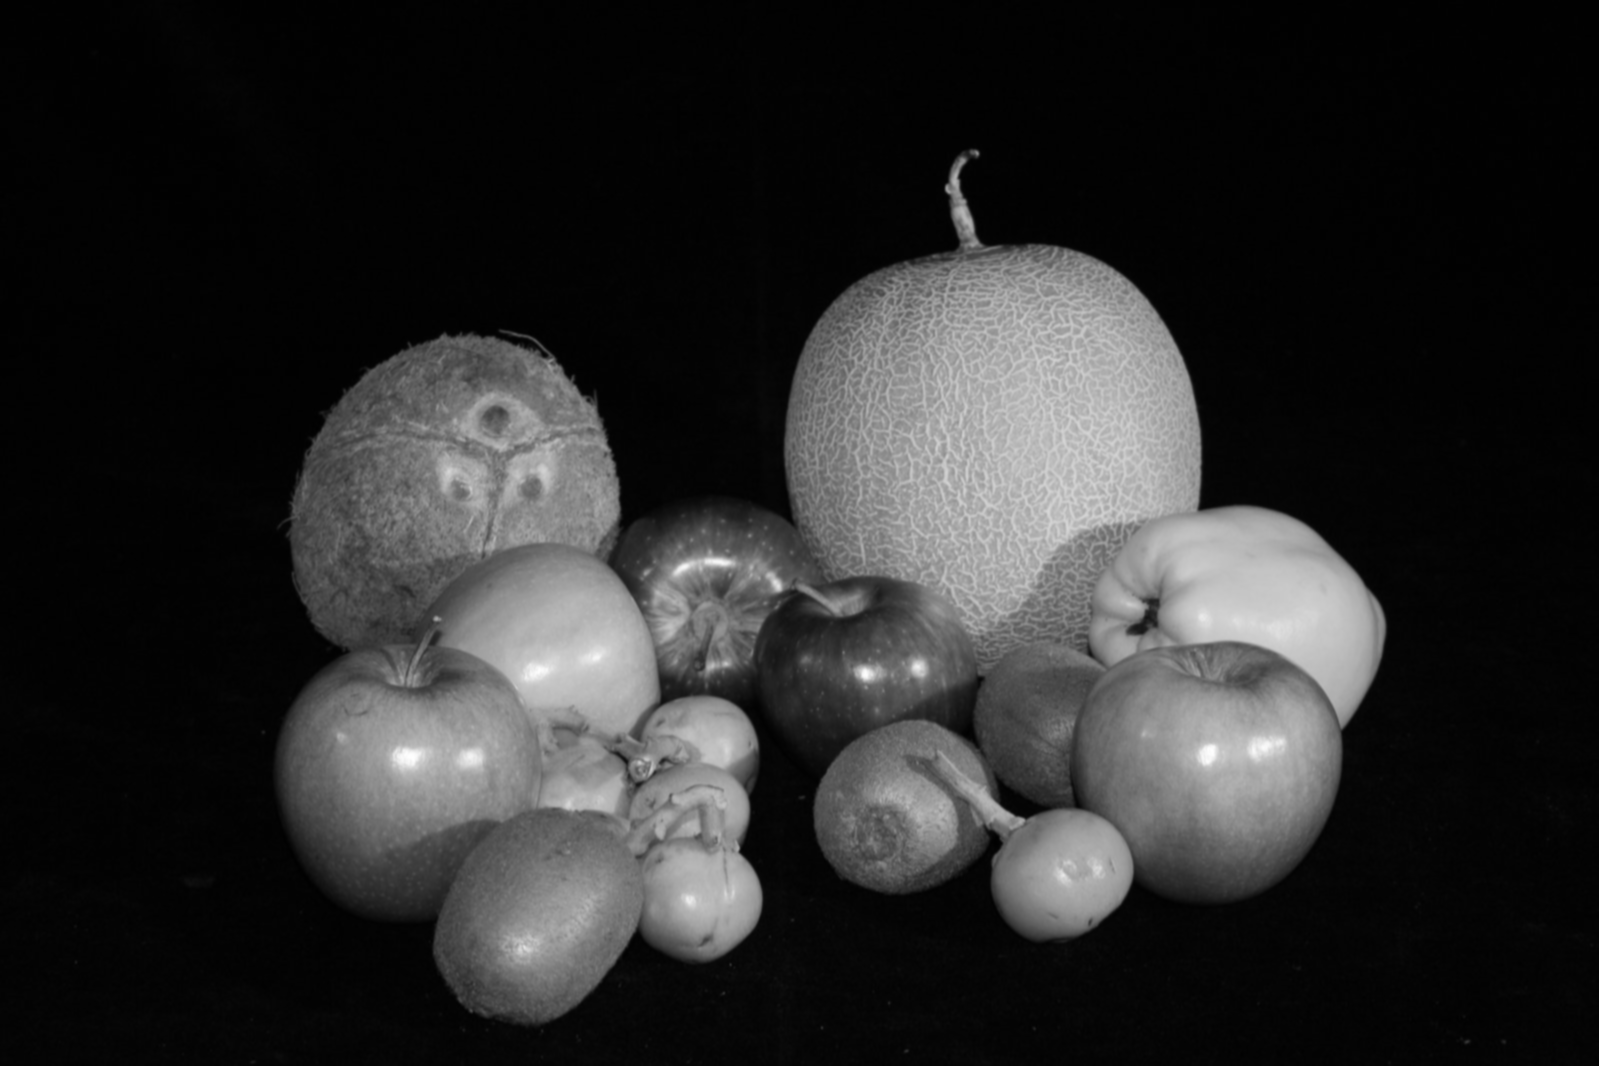



************Median Blur****************


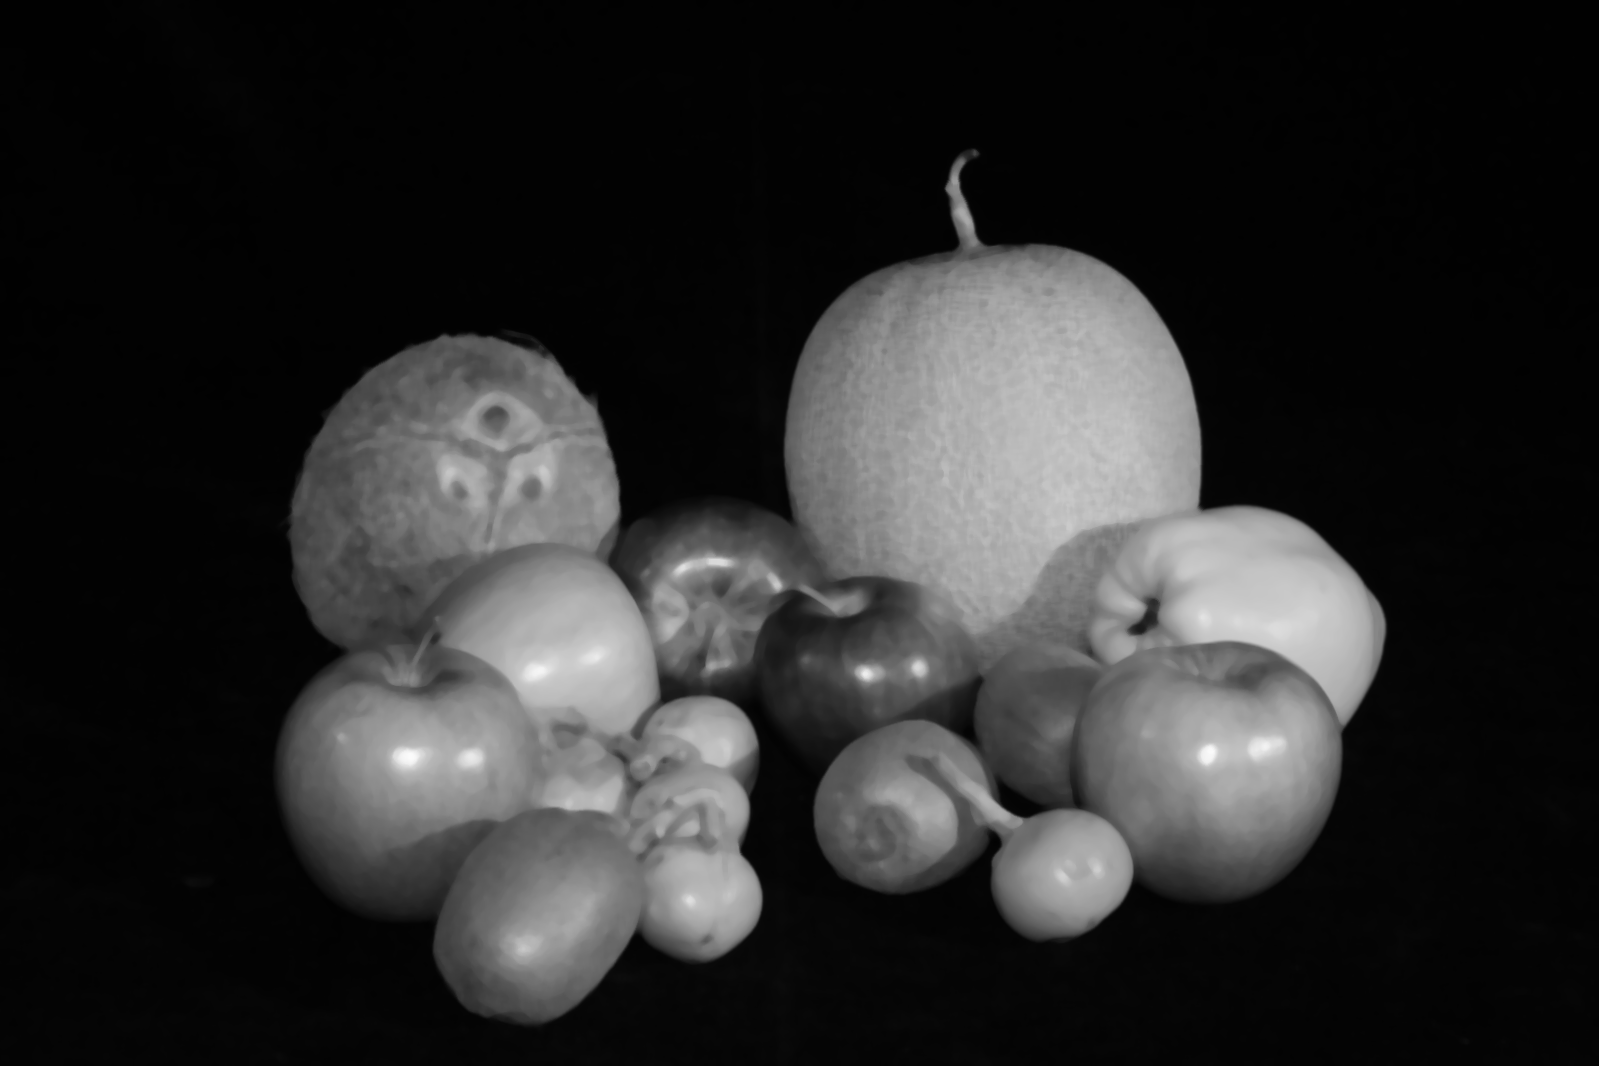



Number of circles detected: 16


*****************Hough transform on image****************


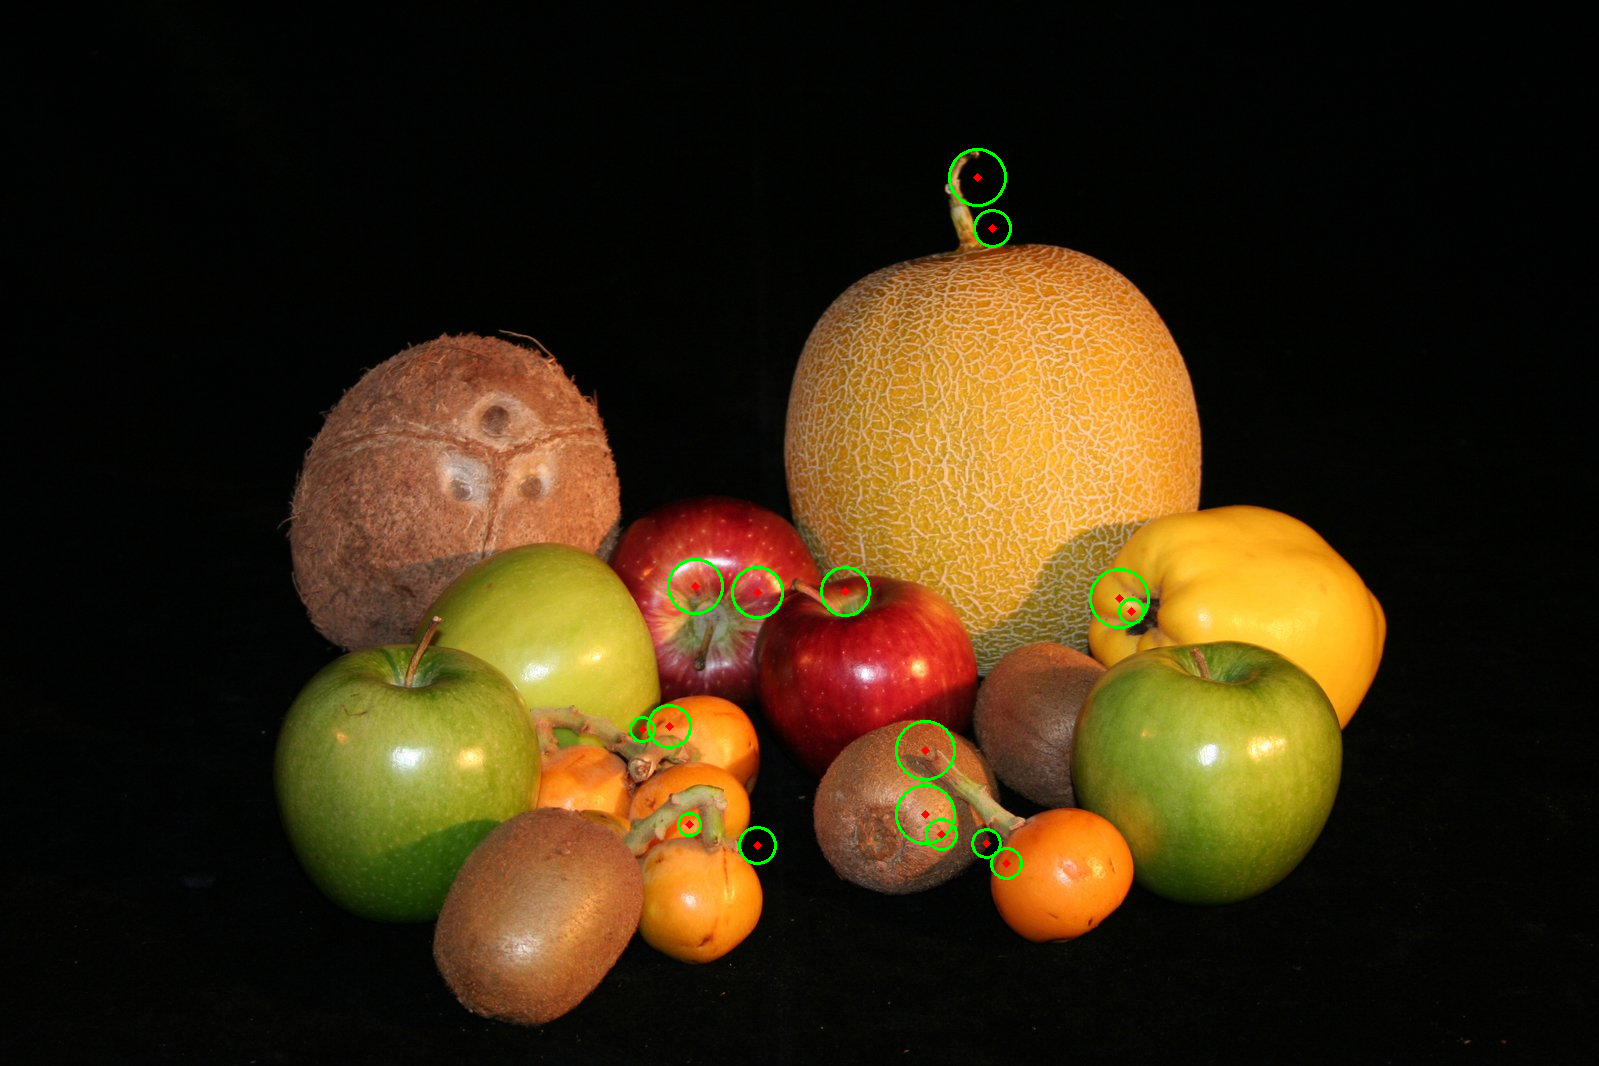

In [6]:
def main():
  # read input image from the path 
  image = cv2.imread('/content/drive/MyDrive/cvexam/Fruits_examimage.jpg')
  detect_circles(image)
  
if __name__:main()